## # Introduction
<p><img src="https://assets.datacamp.com/production/project_1010/img/book_cover.jpg" alt="The book cover of Peter and Wendy" style="width:183;height:253px;"></p>
<h3 id="flyawaywithpeterpan">Fly away with Peter Pan!</h3>
<p>Peter Pan has been the companion of many children, and went a long way, starting as a Christmas play and ending up as a Disney classic. Did you know that although the play was titled "Peter Pan, Or The Boy Who Wouldn't Grow Up", J. M. Barrie's novel was actually titled "Peter and Wendy"? 

In [69]:
#Importing the libraries we will be using for the analysis
import requests
import nltk
from bs4 import BeautifulSoup
from collections import Counter

In [70]:
#Scrapping data from the website
url = 'https://www.gutenberg.org/files/16/16-h/16-h.htm'
book = requests.get(url)
book.encoding = 'utf-8'
b_html = book.text
print(b_html[:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Peter Pan, by James M. Barrie</title>

<style type="text/css">

body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

.no-break {page-break-before: avoid;} /* for 


In [71]:
#Cleaning the html code to access the text we are interested in 
soup = BeautifulSoup(b_html)
text = soup.text
print(text[:1500])






The Project Gutenberg eBook of Peter Pan, by James M. Barrie


body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

.no-break {page-break-before: avoid;} /* for epubs */

div.chapter {page-break-before: always; margin-top: 4em;}

hr {width: 80%; margin-top: 2em; margin-bottom: 2em;}

p {text-indent: 1em;
   margin-top: 0.25em;
   margin-bottom: 0.25em; }

p.poem {text-indent: 0%;
        margin-left: 10%;
        font-size: 90%;
        margin-top: 1em;
        margin-bottom: 1em; }

p.letter {text-indent: 0%;
          margin-left

In [72]:
#using nltk to tokenize (break) our text into words 
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(text)
print(tokens[:6])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Peter']


In [73]:
#Lowering all the tokens so that Upper Case and lower case words are not counted seperately
words = [token.lower() for token in tokens]
print(words[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'peter', 'pan', 'by', 'james', 'm']


In [74]:
#Identifying the stop words in our text
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words[:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [75]:
#Removing stop words so they don't falsify our results
words_clean = [word for word in words if word not in stop_words]
print(words_clean[:10])

['project', 'gutenberg', 'ebook', 'peter', 'pan', 'james', 'barrie', 'body', 'margin', 'left']


In [76]:
#counting the words to find the most common words
count = Counter(words_clean)
top_ten = count.most_common(10)
print(top_ten)

[('peter', 409), ('wendy', 362), ('said', 358), ('would', 217), ('one', 212), ('hook', 174), ('could', 142), ('cried', 136), ('john', 133), ('time', 126)]


In [77]:
protagonists = ['peter','wendy','hook','john']

In [78]:
#Importing the required libraries to create a visualization for the most frequent words
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [79]:
#Creating a dataframe with the top ten words
df = pd.DataFrame(top_ten,columns = ['words', 'occurences'])
df.head(5)

,words,occurences
0,peter,409
1,wendy,362
2,said,358
3,would,217
4,one,212


Text(0.5, 1.0, 'Peter Pans most Common words')

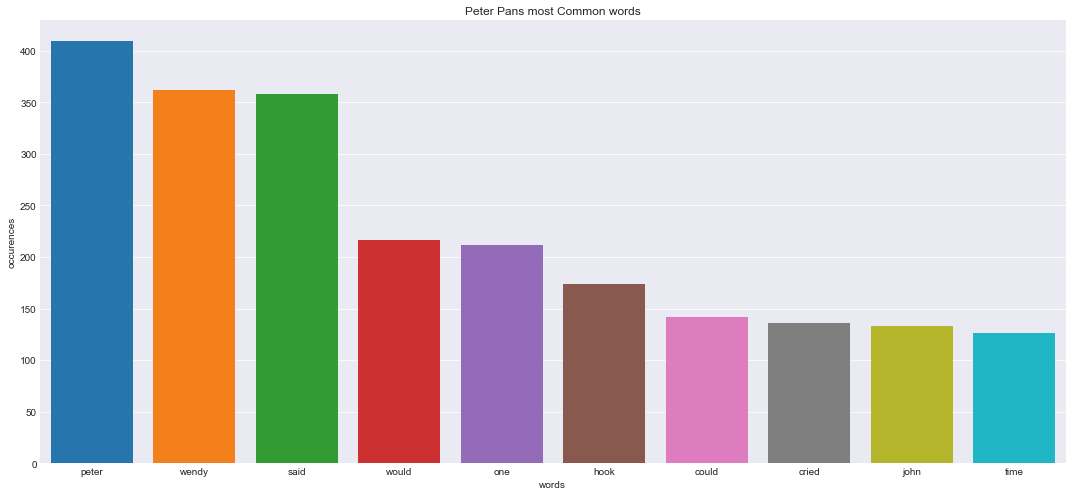

In [80]:
#Creating a Visualization for the most common words
sns.set_style('darkgrid')
plt.figure(figsize = (15, 7))
sns.barplot(x = 'words', y = 'occurences', data = df, saturation = 0.9).set_title\
('Peter Pans most Common words')